# **LunarLaunch - Policy Gradient**

The implementation of Policy Gradient for LunarLunch v2.



## Initialization

In [1]:
%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt

In [2]:
from sim.GymTrainer import GymTrainer
from framework.PolicyGradient import PolicyGradientAgent

import torch
trainDevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# Create the simulation environment
sim = GymTrainer(
    'LunarLander-v3', 
    evalDevice="cpu", 
    trainDevice=trainDevice, 
    render_mode='rgb_array', 
    envNum=4,
    maxEpisode=1500,
    batchSize=4,
    maxStep=1000,
    stepLimitPenalty=150,
    seed=543)

=============Initializing=============
Initializing Gym Environments of LunarLander-v3
init envs
set seeds 543


In [4]:
# Create the agent
agent = PolicyGradientAgent(
    actionNum=sim.actionSize(), 
    stateNum=8, 
    gamma=0.99, 
    policyLR=0.006)

## Training

In [5]:
name, writer = sim.makeSummaryWriter(agent)
sim.train(agent, writer)

=============Start Training=============
Batch:1 	 Episode:4 	 Loss: -0.00 	 AvgRew: -186.49 	 FinRew: -100.00
Batch:2 	 Episode:8 	 Loss: -0.00 	 AvgRew: -218.06 	 FinRew: -100.00
Batch:3 	 Episode:12 	 Loss: -0.01 	 AvgRew: -209.67 	 FinRew: -100.00
Batch:4 	 Episode:16 	 Loss: 0.00 	 AvgRew: -151.23 	 FinRew: -100.00
Batch:5 	 Episode:20 	 Loss: 0.01 	 AvgRew: -162.92 	 FinRew: -100.00
Batch:6 	 Episode:24 	 Loss: -0.01 	 AvgRew: -141.29 	 FinRew: -100.00
Batch:7 	 Episode:28 	 Loss: 0.00 	 AvgRew: -88.21 	 FinRew: -100.00
Batch:8 	 Episode:32 	 Loss: -0.00 	 AvgRew: -123.80 	 FinRew: -100.00
Batch:9 	 Episode:36 	 Loss: -0.00 	 AvgRew: -164.75 	 FinRew: -100.00
Batch:10 	 Episode:40 	 Loss: 0.01 	 AvgRew: -102.06 	 FinRew: -100.00
Batch:11 	 Episode:44 	 Loss: -0.00 	 AvgRew: -177.39 	 FinRew: -100.00
Batch:12 	 Episode:48 	 Loss: 0.01 	 AvgRew: -162.00 	 FinRew: -100.00
Batch:13 	 Episode:52 	 Loss: -0.01 	 AvgRew: -143.65 	 FinRew: -100.00
Batch:14 	 Episode:56 	 Loss: 0.00 	 Avg

## Testing

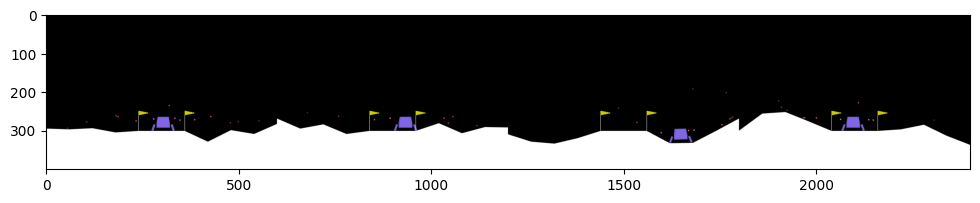

Average Total Reward:75.01546478271484 	 Max Total Reward:154.51492309570312 	 Min Total Reward:-23.739639282226562


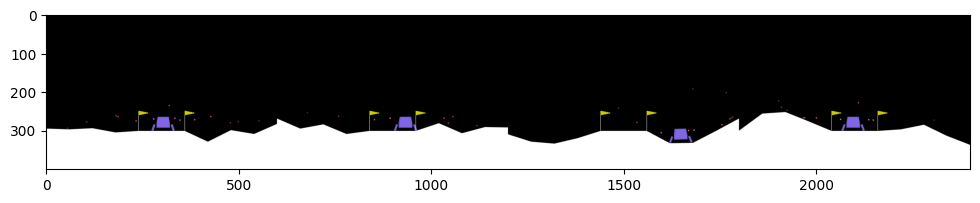

In [6]:
sim.test(
    agent = agent, 
    episode = 12, 
    maxStep = 1000, 
    renderStep = 3,
    writer = writer)

## Save

In [7]:
agent.save(name)

PolicyGradientAgent(
  (policy): PolicyNetwork(
    (fc1): Linear(in_features=8, out_features=8, bias=True)
    (fc2): Linear(in_features=8, out_features=8, bias=True)
    (fc3): Linear(in_features=8, out_features=4, bias=True)
  )
)